In [18]:
import pandas as pd
import tensorflow as tf
import numpy as np

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [19]:
mean_vals = np.mean(X_train, axis = 0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals) / std_val
X_test_centered = (X_test - mean_vals) / std_val

del X_train, X_test

In [20]:
X_train_centered = X_train_centered.reshape(60000, 784)
X_test_centered = X_test_centered.reshape(10000, 784)

In [21]:
# one-hot encoding labels
y_train_onehot = tf.keras.utils.to_categorical(y_train)

print('original : ', y_train[:3])
print('encoded : ', y_train_onehot[:3])

original :  [5 0 4]
encoded :  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# feed-forward neural network modeling

### input dim must be matched with datasets columns

In [22]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units = 50,
                                input_dim = X_train_centered.shape[1],
                                kernel_initializer = 'glorot_uniform',
                                bias_initializer = 'zeros',
                                activation = 'tanh'))

model.add(tf.keras.layers.Dense(units = 50,
                                input_dim = X_train_centered.shape[1],
                                kernel_initializer = 'glorot_uniform',
                                bias_initializer = 'zeros',
                                activation = 'tanh'))

model.add(tf.keras.layers.Dense(units = y_train_onehot.shape[1],
                                input_dim = 50,
                                kernel_initializer = 'glorot_uniform',
                                bias_initializer = 'zeros',
                                activation = 'softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


# before training model compile
1. 최적화할 손실함수 정의
2. 최적화에 사용할 경사 하강법 옵티마이저 선택
3. 마지막 비용함수는 categorical_crossentropy
4. 학습률 감쇠 상수 (decay)와 momentum 값 지정

In [24]:
sgd_optimizer = tf.keras.optimizers.SGD(lr = 0.001, decay = 1e-7, momentum = .0)

model.compile(optimizer = sgd_optimizer,
              loss = 'categorical_crossentropy')

# fit method
1. mini_batch 경사하강법 적용 (batch_size)
2. verbose = 1 : 훈련하는 동안 비용 함수의 최적화 과정을 따라간다는 뜻
3. validation_split : 원하는 비율만큼의 훈련데이터를 검증에 사용해 과대적합 모니터링 가능

In [25]:
history = model.fit(X_train_centered, y_train_onehot,
                    batch_size = 64, epochs = 50,
                    verbose = 1, validation_split = 0.1)

Epoch 1/50
844/844 [==============================] - 1s 885us/step - loss: 1.5735 - val_loss: 1.0565
Epoch 2/50
844/844 [==============================] - 1s 752us/step - loss: 0.9603 - val_loss: 0.7510
Epoch 3/50
844/844 [==============================] - 1s 734us/step - loss: 0.7553 - val_loss: 0.6090
Epoch 4/50
844/844 [==============================] - 1s 773us/step - loss: 0.6452 - val_loss: 0.5260
Epoch 5/50
844/844 [==============================] - 1s 776us/step - loss: 0.5754 - val_loss: 0.4711
Epoch 6/50
844/844 [==============================] - 1s 766us/step - loss: 0.5265 - val_loss: 0.4319
Epoch 7/50
844/844 [==============================] - 1s 760us/step - loss: 0.4901 - val_loss: 0.4024
Epoch 8/50
844/844 [==============================] - 1s 769us/step - loss: 0.4617 - val_loss: 0.3791
Epoch 9/50
844/844 [==============================] - 1s 737us/step - loss: 0.4389 - val_loss: 0.3604
Epoch 10/50
844/844 [==============================] - 1s 755us/step - loss: 0.420

# 예측

In [27]:
y_train_pred = np.argmax(model.predict(X_train_centered, verbose = 0), axis = -1)
print('첫 3개: ', y_train_pred[:3])

첫 3개:  [5 0 4]


# 정확도

In [31]:
correct_preds = np.sum(y_train == y_train_pred, axis = 0)
train_acc = correct_preds / y_train.shape[0]

print('훈련 정확도 : ', round((train_acc * 100), 3))

y_test_pred = np.argmax(model.predict(X_test_centered, verbose = 0), axis = -1)
correct_preds = np.sum(y_test == y_test_pred, axis = 0)
test_acc = correct_preds / y_test.shape[0]

print('테스트 정확도 : ', round((test_acc * 100), 3))

훈련 정확도 :  93.785
테스트 정확도 :  93.43


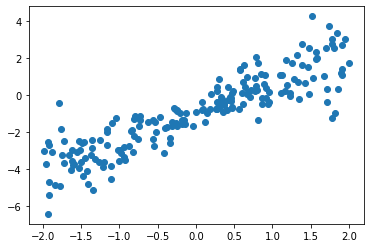

In [32]:
import matplotlib.pyplot as plt
np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low = -2, high = 2, size = 200)
    y = []
    for t in x:
        r = np.random.normal(loc = 0.0,
                             scale = (0.5 + t*t/3),
                             size = None)
        y.append(r)
    return x, 1.726*x - 0.84 + np.array(y)

x, y = make_random_data()

plt.plot(x, y, 'o')
plt.show()

# keras에서는 fit할 때, 간단한 설정으로 검증세트를 만들 수 있음

In [33]:
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [35]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_dim = 1))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer = 'sgd', loss = 'mse')
history = model.fit(x_train, y_train, epochs = 500,
                    validation_split = 0.3)

Epoch 1/500
4/4 [==============================] - 0s 18ms/step - loss: 0.7564 - val_loss: 0.9028
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7556 - val_loss: 0.9020
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7562 - val_loss: 0.9053
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7564 - val_loss: 0.9084
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7565 - val_loss: 0.9065
Epoch 6/500
4/4 [==============================] - 0s 5ms/step - loss: 0.7567 - val_loss: 0.9035
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7565 - val_loss: 0.9049
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7571 - val_loss: 0.9025
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7559 - val_loss: 0.9019
Epoch 10/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7570 - val_loss: 0.9012
Epoch 11/500
4/4 [==========

4/4 [==============================] - 0s 4ms/step - loss: 0.7559 - val_loss: 0.9047
Epoch 85/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7560 - val_loss: 0.9079
Epoch 86/500
4/4 [==============================] - 0s 5ms/step - loss: 0.7578 - val_loss: 0.9053
Epoch 87/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7569 - val_loss: 0.9055
Epoch 88/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7560 - val_loss: 0.9100
Epoch 89/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7561 - val_loss: 0.9052
Epoch 90/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7566 - val_loss: 0.9038
Epoch 91/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7570 - val_loss: 0.9019
Epoch 92/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7561 - val_loss: 0.9029
Epoch 93/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7572 - val_loss: 0.9046
Epoch 94/500
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.7585 - val_loss: 0.8950
Epoch 168/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7570 - val_loss: 0.8997
Epoch 169/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7558 - val_loss: 0.8980
Epoch 170/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7589 - val_loss: 0.8981
Epoch 171/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7582 - val_loss: 0.9016
Epoch 172/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7567 - val_loss: 0.9096
Epoch 173/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7556 - val_loss: 0.9105
Epoch 174/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7574 - val_loss: 0.9077
Epoch 175/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7563 - val_loss: 0.9088
Epoch 176/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7572 - val_loss: 0.9088
Epoch 177/500
4/4 [=====

Epoch 250/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7587 - val_loss: 0.9241
Epoch 251/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7588 - val_loss: 0.9206
Epoch 252/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7573 - val_loss: 0.9167
Epoch 253/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7571 - val_loss: 0.9192
Epoch 254/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7577 - val_loss: 0.9216
Epoch 255/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7586 - val_loss: 0.9201
Epoch 256/500
4/4 [==============================] - ETA: 0s - loss: 1.087 - 0s 4ms/step - loss: 0.7573 - val_loss: 0.9163
Epoch 257/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7589 - val_loss: 0.9071
Epoch 258/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7575 - val_loss: 0.9052
Epoch 259/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7562 - val

4/4 [==============================] - 0s 4ms/step - loss: 0.7567 - val_loss: 0.9085
Epoch 333/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7561 - val_loss: 0.9089
Epoch 334/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7563 - val_loss: 0.9066
Epoch 335/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7566 - val_loss: 0.9077
Epoch 336/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7576 - val_loss: 0.9078
Epoch 337/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7571 - val_loss: 0.9021
Epoch 338/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7560 - val_loss: 0.9016
Epoch 339/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7572 - val_loss: 0.9019
Epoch 340/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7569 - val_loss: 0.9028
Epoch 341/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7568 - val_loss: 0.9025
Epoch 342/500
4/4 [=====

Epoch 415/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7566 - val_loss: 0.8916
Epoch 416/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7569 - val_loss: 0.8980
Epoch 417/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7570 - val_loss: 0.9022
Epoch 418/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7557 - val_loss: 0.9005
Epoch 419/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7563 - val_loss: 0.9005
Epoch 420/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7563 - val_loss: 0.8970
Epoch 421/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7570 - val_loss: 0.8958
Epoch 422/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7573 - val_loss: 0.8970
Epoch 423/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7570 - val_loss: 0.8937
Epoch 424/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7565 - val_loss: 0.8969
Epoch 425/

4/4 [==============================] - 0s 4ms/step - loss: 0.7570 - val_loss: 0.8992
Epoch 498/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7561 - val_loss: 0.8974
Epoch 499/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7572 - val_loss: 0.8950
Epoch 500/500
4/4 [==============================] - 0s 4ms/step - loss: 0.7589 - val_loss: 0.8944


# function api

In [41]:
from tensorflow.keras import Model, Input

input = tf.keras.Input(shape=(1,))
output = tf.keras.layers.Dense(1)(input)

model = tf.keras.Model(input, output)

In [42]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# save keras model

### 가중치만 저장
- 모델 구조층 다시 생성해야함

In [ ]:
model.save_weights('simple_weights.h5')

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_dim = 1))
model.compile(optimizer = 'sgd', loss = 'mse')

model.load_weights('simple_weights.h5')

In [ ]:
# test set evaluation
model.evaluate(x_test, y_test)

### 모델 전체 저장

In [ ]:
model.save('simple_model.h5')

### modelcheckpoint 콜백 : 최고의 성능을 내는 가중치 저장
### earlyStopping 콜백 : 성능이 개선되지 않을 때 훈련을 멈춤

##### monitor = 'val_loss' : 검증 데이터 손실을 모니터 하면서 save_best_only = True

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_dim = 1))

callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath = 'my_model.h5',
                                                    monitor = 'val_loss',
                                                    save_best_only = True),
                 tf.keras.callbacks.EarlyStopping(patience = 5)]
history = model.fit(x_train, y_train, epochs = 500,
                    validation_split = 0.2, callbacks = callback_list)